In [1]:
from matplotlib import pyplot as plt
import platform, os, sys
import numpy as np
from tabulate import tabulate
from pprint import pprint

if 'Windows' in platform.system():
    sys.path.append(r'C:\Users\slab\Documents\Code')
    sys.path.append(r'D:\BEMPP_shared\Modules')
    import interpolate_slow
else:
    sys.path.append(r'/mnt/s/_Data/160513 - EonHe M016v5/modules')
    from BEM import interpolate_slow
    
from Common import common, kfit
from TrapAnalysis import trap_analysis

%matplotlib inline
%config InlineBackend.figure_format='retina'

Could not import BEM module. Please do so manually.


In [25]:
L = 10E-9 # in Henry
C = 0.001E-9 # in Farad
Z0 = 50.

def S21(f, L, C, Z0):
    omega = 2*np.pi*f
    return np.abs(2/(2-omega**2*L*C+1j*omega*(L/Z0 + C*Z0)))

print 1/(2*np.pi*np.sqrt(L*C))/1E9

1.59154943092


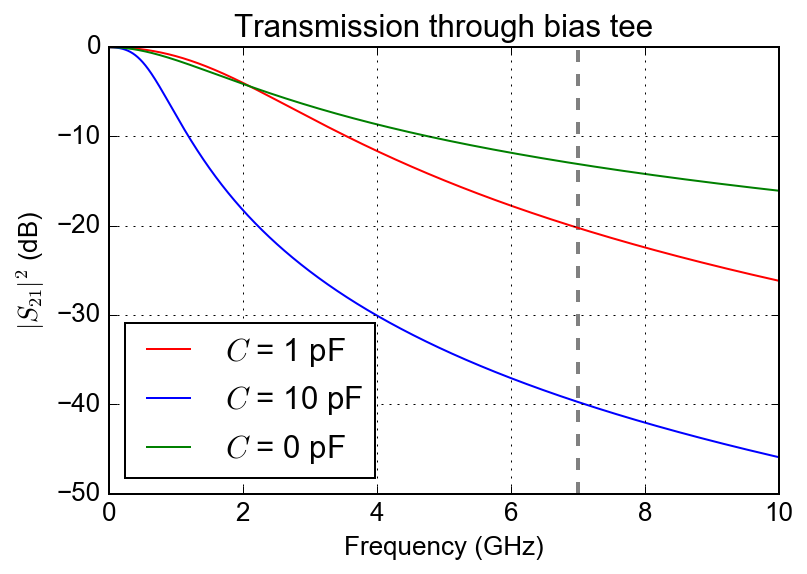

In [30]:
f = np.linspace(0, 10E9, 1E4)

plt.figure(figsize=(6.,4.))
common.configure_axes(13)
plt.plot(f/1e9, 20*np.log10(S21(f, L, 1E-12, Z0)), 'r', label="$C$ = %.0f pF"%(1))
plt.plot(f/1e9, 20*np.log10(S21(f, L, 10E-12, Z0)), 'b', label="$C$ = %.0f pF"%(10))
plt.plot(f/1e9, 20*np.log10(S21(f, L, 0, Z0)), 'g', label="$C$ = 0 pF")
plt.xlabel('Frequency (GHz)')
plt.ylabel('$|S_{21}|^2$ (dB)')
plt.grid()
plt.title("Transmission through bias tee")
plt.legend(loc=3)
ylims = plt.ylim()
plt.vlines(7.0, ylims[0], ylims[1], linestyles='--', lw=2.0, color='gray')